## 신용카드 사용자 연체 예측 AI 경진대회

### 데이터 변수
 - gender: 성별
 - car: 차량 소유 여부
 - reality : 부동산 소유 여부
 - child num: 자녀 수
 - income_total : 연간 소득
 - income_type : 소득 분류=> ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
 - edu_type : 교육 수준 => ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
 - family_type: 결혼 여부 => ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
 - house_type: 생활방식 => ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']
 - day_birth: 출생일 =>-1은 데이터 수집일 하루 전 출생,데이터수집당시 0으로부터 역으로 셈(하루단위)
 - day_employed: 업무 시작일. 하루단위로 계산. 양수는 고용x
 - flag_mobil: 휴대폰 소유 여부
 - work_phone: 업무용 전화 소유 여부
 - phone: 전화 소유 여부
 - email: 이메일 소유 여부
 - occyp_type: 직업 유형
 - family_size: 가족 규모
 - begin_month: 신용카드 발급월

종속변수 (credit) : 사용자의 신용카드 대금 연체를 기준으로 한 신용도. 낮을수록 높은 신용의 신용카드 사용자를 의미

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submit=pd.read_csv('sample_submission.csv')
df_train=train.copy()
df_test=test.copy()

In [3]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [5]:
print(train.shape,test.shape)

(26457, 20) (10000, 19)


In [6]:
train.info() #occyp_type만 결측값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

### 결측치 확인

In [7]:
#결측치 제거
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

<AxesSubplot:>

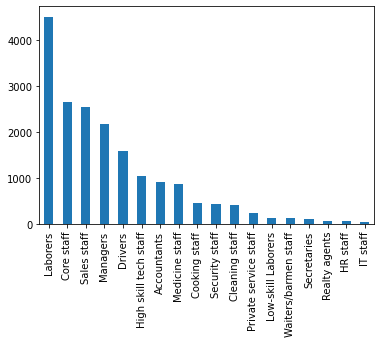

In [9]:
train['occyp_type'].value_counts().plot(kind='bar')
#laborers가 많은 편. core staff, sales staff,managers,drivers 순으로 나타남
#노동자들이 많은 타입

In [10]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

## EDA

### 결측치 분석

In [11]:
non_occyp=df_train.loc[df_train['occyp_type'].isnull()]#직업유형이 없는 사람
occyp=df_train.dropna()#직업유형이 있는 사람

In [11]:
#train=train.drop('occyp_type',axis=0)
#test=test.drop('occyp_type',axis=0)

In [12]:
non_occyp.head() #직업이 없는 사람

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0


In [13]:
non_occyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8171 entries, 0 to 26453
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8171 non-null   int64  
 1   gender         8171 non-null   object 
 2   car            8171 non-null   object 
 3   reality        8171 non-null   object 
 4   child_num      8171 non-null   int64  
 5   income_total   8171 non-null   float64
 6   income_type    8171 non-null   object 
 7   edu_type       8171 non-null   object 
 8   family_type    8171 non-null   object 
 9   house_type     8171 non-null   object 
 10  DAYS_BIRTH     8171 non-null   int64  
 11  DAYS_EMPLOYED  8171 non-null   int64  
 12  FLAG_MOBIL     8171 non-null   int64  
 13  work_phone     8171 non-null   int64  
 14  phone          8171 non-null   int64  
 15  email          8171 non-null   int64  
 16  occyp_type     0 non-null      object 
 17  family_size    8171 non-null   float64
 18  begin_m

In [14]:
occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0


In [15]:
occyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18286 entries, 1 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          18286 non-null  int64  
 1   gender         18286 non-null  object 
 2   car            18286 non-null  object 
 3   reality        18286 non-null  object 
 4   child_num      18286 non-null  int64  
 5   income_total   18286 non-null  float64
 6   income_type    18286 non-null  object 
 7   edu_type       18286 non-null  object 
 8   family_type    18286 non-null  object 
 9   house_type     18286 non-null  object 
 10  DAYS_BIRTH     18286 non-null  int64  
 11  DAYS_EMPLOYED  18286 non-null  int64  
 12  FLAG_MOBIL     18286 non-null  int64  
 13  work_phone     18286 non-null  int64  
 14  phone          18286 non-null  int64  
 15  email          18286 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    18286 non-null  float64
 18  begin_

In [16]:
occyp.loc[occyp['DAYS_EMPLOYED']>0]#1이 없음
#전부다 고용된 상태임

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [17]:
non_occyp['DAYS_EMPLOYED'].value_counts()
#양수인 부분이 4438개->고용된 사람과 그렇지 않은 사람이 존재한다.

 365243    4438
-302         25
-1613        21
-2014        21
-3079        21
           ... 
-873          1
-4029         1
-825          1
-3608         1
-2051         1
Name: DAYS_EMPLOYED, Length: 963, dtype: int64

In [18]:
non_occyp['employeed']=[1 if t<0 else 0 for t in list(non_occyp['DAYS_EMPLOYED'])]

C:\Users\zzang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
non_occyp.head()#양수면 0,음수면 1

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,...,-1466,1,0,0,1,NaN,3.0,-38.0,2.0,1
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-37.0,2.0,0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,-6031,1,0,0,0,NaN,2.0,-7.0,2.0,1


결측치에 해당하는 값을 조사한 결과 고용이 안 된 사람과 된 사람 모두 포함되지만 결측값이 없는 상태는 모두 고용이 된 사람들이다.

In [20]:
#결측값 중 고용된 사람 중에서 소득분류 분포
non_occyp.loc[non_occyp['employeed']==1]['income_type'].value_counts()

Working                 2312
Commercial associate    1026
State servant            392
Pensioner                  2
Student                    1
Name: income_type, dtype: int64

일하는 사람은 2312,상업 제휴를 하는 사람은 1026,공무원은 392,학생은 1명,연금수령자는 2명(2명은 정년퇴직?)

In [21]:
non_occyp.loc[non_occyp['employeed']==0]['income_type'].value_counts()
#고용되지 않은 사람 중에는 연금을 수령한 사람들이다.

Pensioner    4438
Name: income_type, dtype: int64

In [22]:
occyp['employeed']=1

C:\Users\zzang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0,1


In [24]:
print(occyp.shape,non_occyp.shape)

(18286, 21) (8171, 21)


<AxesSubplot:>

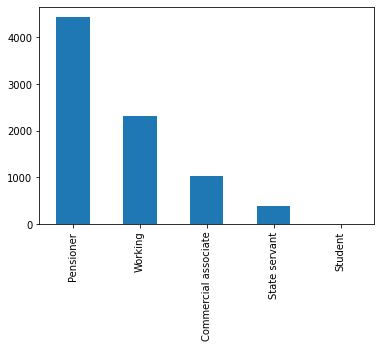

In [25]:
non_occyp['income_type'].value_counts().plot(kind='bar')
#결측치가 들어간 데이터 내 소득 분류는 연금을 받은 사람들이 많다.

In [26]:
non_occyp.loc[non_occyp['income_type']=='Pensioner']
#연금을 받는 사람들 대상으로 조사 결과 income_total은 결측치가 없다

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-37.0,2.0,0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-7.0,2.0,0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-5.0,2.0,0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,1,0,NaN,1.0,-24.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,1,NaN,1.0,-60.0,1.0,0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-17.0,1.0,0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-57.0,2.0,0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-43.0,2.0,0


In [29]:
pensioner=df_train.loc[(df_train['income_type']=='Pensioner')]
#연금을 받는 사람들 대상으로 조사 결과 income_total은 결측치가 없다
pensioner.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0


C:\Users\zzang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

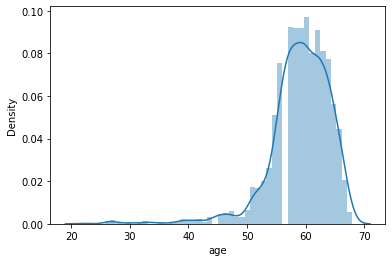

In [31]:
pensioner['age']=pensioner['DAYS_BIRTH']//-365
pensioner[['income_total','age']]
sns.distplot(pensioner['age'])

연금을 받는 사람들은 50~70대에 밀집되어있다.

In [32]:
pensioner['age'].value_counts()

60    398
57    379
58    376
59    376
62    373
63    332
61    329
64    316
56    310
65    230
55    210
66    182
54    107
67     84
53     83
51     71
52     69
50     26
47     24
68     23
46     20
45     19
49     13
48     13
44     13
42      9
39      9
27      8
40      7
41      7
33      6
26      4
38      4
35      4
30      4
43      3
32      2
22      2
37      2
28      2
Name: age, dtype: int64

In [33]:
pensioner.loc[pensioner['age']<30]['family_size'].value_counts()

3.0    8
1.0    5
2.0    3
Name: family_size, dtype: int64

In [34]:
pensioner.loc[pensioner['age']<30]['house_type'].value_counts()

House / apartment    15
With parents          1
Name: house_type, dtype: int64

In [58]:
pensioner.loc[pensioner['age']<30]['edu_type'].value_counts()
#30대 미만은 중◦고등학교(의무교육)이 최종학력이다.

Secondary / secondary special    15
Higher education                  1
Name: edu_type, dtype: int64

In [55]:
pensioner.loc[pensioner['DAYS_EMPLOYED']<0][['edu_type','age']]
#고용된 사람 중 연금을 받은 사람은 정년퇴직으로 추정, 28~55세로 다양하다,
#각각 학위를 받거나 고졸인 상태다.

,edu_type,age
1964,Higher education,33
5786,Secondary / secondary special,41
6695,Higher education,28
6743,Higher education,37
9793,Secondary / secondary special,56
10357,Secondary / secondary special,30
14356,Higher education,38
15682,Secondary / secondary special,55
17278,Secondary / secondary special,33
23227,Higher education,48


In [60]:
pensioner.loc[pensioner['DAYS_EMPLOYED']>0]['edu_type'].value_counts()
#연금을 받은 사람 중 고용이 안 된 사람의 최종학력은 중,고졸들이 많다.

Secondary / secondary special    3555
Higher education                  731
Lower secondary                   106
Incomplete higher                  45
Academic degree                     1
Name: edu_type, dtype: int64

In [35]:
df_test.loc[(df_test['occyp_type'].isnull()) &(df_test['DAYS_EMPLOYED']>0)]['income_type'].value_counts()
#직업유형이 없는 사람 중 고용이 안 된 사람은 소득분류는 모두 연금을 받은 상태다

Pensioner    1697
Name: income_type, dtype: int64

In [36]:
df_test.loc[(df_test['occyp_type'].isnull()) &(df_test['DAYS_EMPLOYED']<0)]['income_type'].value_counts()
#직업유형이 없는 사람 중 고용된 사람은 연금을 받은 사람이 2명,
#나머지는 working,상업 제휴,공무원이다.

Working                 885
Commercial associate    412
State servant           156
Pensioner                 2
Name: income_type, dtype: int64

In [37]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [42]:
df_test['age']=df_test['DAYS_EMPLOYED']//-365

In [43]:
df_test['employeed']=[1 if t<0 else 0 for t in list(df_test['DAYS_EMPLOYED'])]

In [44]:
df_test['age']=[t if t>0 else 0 for t in list(df_test['age'])]

In [45]:
df_test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,employeed,age
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,1,0,NaN,2.0,-60.0,0,0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,...,-8671,1,0,1,0,Core staff,2.0,-36.0,1,23
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,...,-217,1,1,1,0,Laborers,2.0,-40.0,1,0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2531,1,1,0,0,Drivers,2.0,-41.0,1,6
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,...,-9385,1,1,0,0,Managers,2.0,-8.0,1,25


In [113]:
#df_test=df_test.drop(['age','employeed'],axis=1)

### 중복데이터 처리

In [64]:
df=pd.concat([non_occyp,occyp]).sort_values(by='index')
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1


In [66]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed'],
      dtype='object')

In [124]:
#중복데이터 여부:다른 열은 같은데 begin_month만 달라서 제외
duplicated=df.loc[df.duplicated(['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size'])]

In [131]:
duplicated.sort_values(by='DAYS_BIRTH').head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
18952,18952,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-11.0,0.0,0
24279,24279,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-49.0,0.0,0
26112,26112,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-34.0,1.0,0
21815,21815,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-18.0,1.0,0
10345,10345,F,N,N,0,126000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-46.0,2.0,0
14913,14913,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-29.0,1.0,0
5913,5913,F,N,Y,0,103500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-13.0,1.0,0
20308,20308,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-40.0,2.0,0
11314,11314,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-50.0,2.0,0
11553,11553,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-50.0,2.0,0


In [193]:
train.iloc[[18952,24279],:] #동일인물 여부 확인

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
18952,18952,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-25140,365243,1,0,0,0,NaN,1.0,-11.0,0.0
24279,24279,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-25140,365243,1,0,0,0,NaN,1.0,-49.0,0.0


In [192]:
train.iloc[[11553,11314,20308],:] #동일인물 여부 확인

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
11553,11553,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,-24821,365243,1,0,0,0,NaN,2.0,-50.0,2.0
11314,11314,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,-24821,365243,1,0,0,0,NaN,2.0,-50.0,2.0
20308,20308,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,-24821,365243,1,0,0,0,NaN,2.0,-40.0,2.0


In [126]:
len(duplicated)

17698

In [127]:
duplicated['index'].values

array([  192,   210,   319, ..., 26449, 26451, 26452], dtype=int64)

In [128]:
duplicated_1=duplicated.drop_duplicates(['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size'],keep='first')

In [132]:
duplicated_1.sort_values(by='DAYS_BIRTH').head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
18952,18952,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-11.0,0.0,0
26112,26112,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-34.0,1.0,0
21815,21815,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-18.0,1.0,0
10345,10345,F,N,N,0,126000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-46.0,2.0,0
14913,14913,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-29.0,1.0,0
5913,5913,F,N,Y,0,103500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-13.0,1.0,0
11314,11314,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-50.0,2.0,0
12388,12388,M,Y,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,1,NaN,2.0,-12.0,2.0,0
5344,5344,M,Y,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,0,0,NaN,2.0,-43.0,2.0,0
15268,15268,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-12.0,2.0,0


In [133]:
print(len(duplicated_1))

5510


In [134]:
duplicated_1['index'].values #1번째만 남기고 모두 삭제(중복일 경우)

array([  192,   210,   319, ..., 26440, 26444, 26448], dtype=int64)

In [135]:
delete_index=set(duplicated['index'].values)-set(duplicated_1['index'].values)
#중복값이 있는 항목 삭제할 인덱스

In [136]:
len(delete_index)

12188

In [138]:
df_unique=df.drop(index=list(delete_index),axis=0)

In [139]:
df_unique.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1


### 변수별 EDA

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


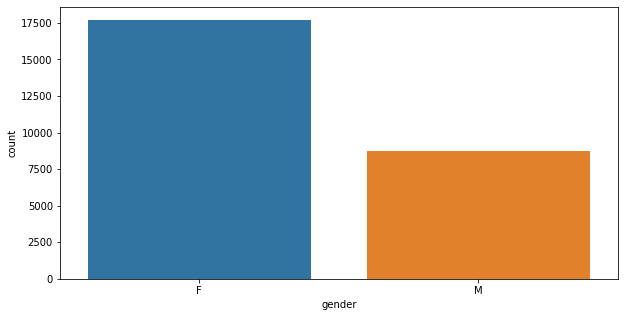

In [67]:
# 성별 분포
plt.figure(figsize=(10,5))
sns.countplot('gender',data=df_train)#여성이 더 많은 편이다.
plt.show()

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


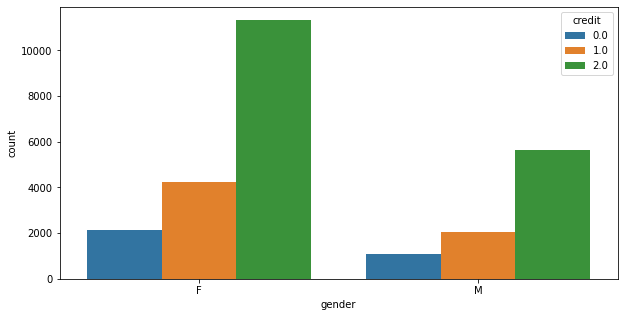

In [68]:
# 성별별 신용도 분포
plt.figure(figsize=(10,5))
sns.countplot('gender',hue='credit',data=df_train)
plt.show()
#남성과 여성 둘 다 2.0대가 높아 신용도가 낮은 편이다.
#하지만 주로 여성에서 많이 나타나는 편이다.

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


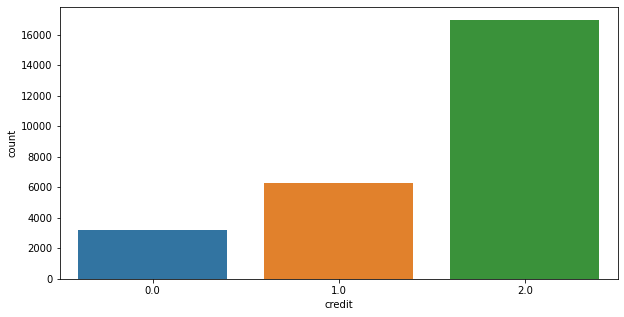

In [69]:
#신용도 그래프
plt.figure(figsize=(10,5))
sns.countplot('credit',data=df_train)
plt.show()
#2.0대 신용도가 많은 것으로 보아 신용도가 낮은 사람들이 많은 것으로 확인된다.

In [34]:
df_train['gender']=df_train['gender'].replace(['F','M'],[0,1])
df_test['gender']=df_test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('------------') #여성:0,남성:1

gender :
0    17697
1     8760
Name: gender, dtype: int64
------------


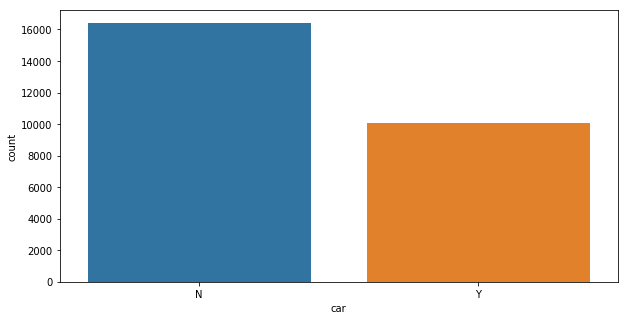

In [35]:
#차량 소지 여부
plt.figure(figsize=(10,5))
sns.countplot('car',data=df)
plt.show() #차량 미소지자가 많은 편이다.

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


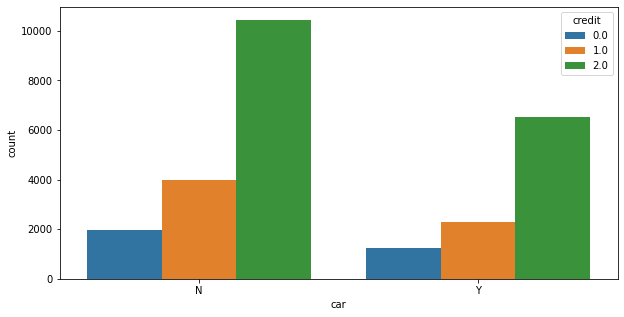

In [141]:
plt.figure(figsize=(10,5)) #차량 소지자별 신용도
sns.countplot('car',hue='credit',data=df_train)
plt.show()
#차를 소유하지 않은 사람들 중에 2.0대가 많은 것으로 보아 신용도가 낮은 사람들 중에서는
#차량을 소지하지 않는 것으로 드러났다.

In [142]:
print('Having a car or not : ')
df_train['car'] = df_train['car'].replace(['N','Y'],[0,1])
df_test['car'] = df_test['car'].replace(['N','Y'],[0,1])
print(df_train['car'].value_counts())
print('--------------')
#차량 소지하지 않은 사람이 많다.

Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------


C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

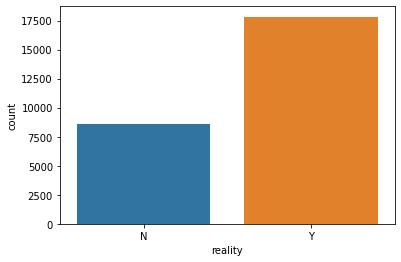

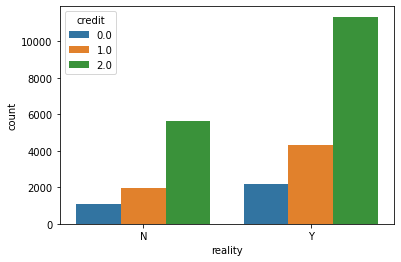

In [143]:
plt.figure(figsize=(10,5))
ax=plt.subplots()
ax=sns.countplot('reality',data=df_train)
ax2=plt.subplots()
ax2=sns.countplot('reality',hue='credit',data=df_train)
#부동산 소유자가 많은 편으로 credit은 2.0으로 갈수록 많다.

In [144]:
print('Having house reality or not: ')
df_train['reality'] = df_train['reality'].replace(['N','Y'],[0,1])
df_test['reality'] = df_test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')#부동산 소유자들이 더 많다

Having house reality or not: 
Y    17830
N     8627
Name: reality, dtype: int64
--------------


C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


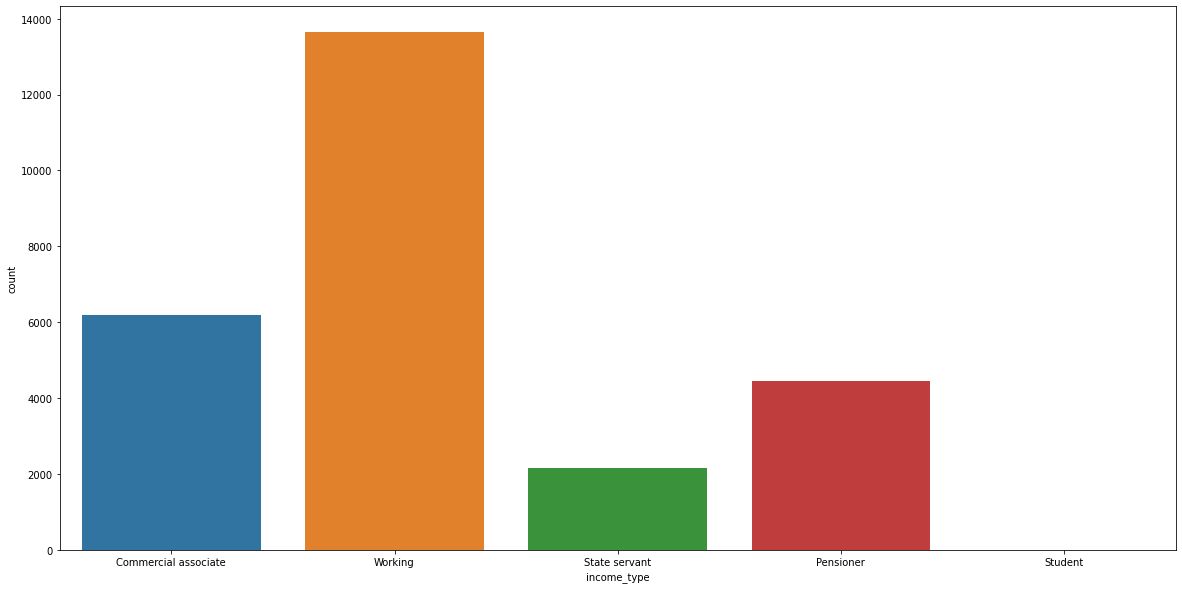

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


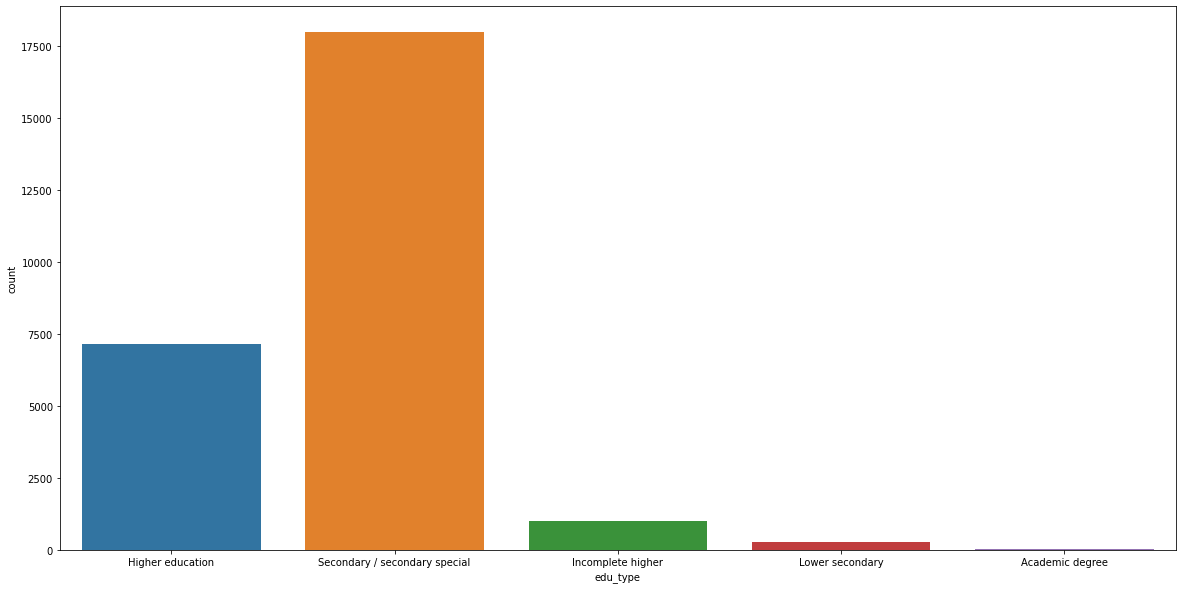

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


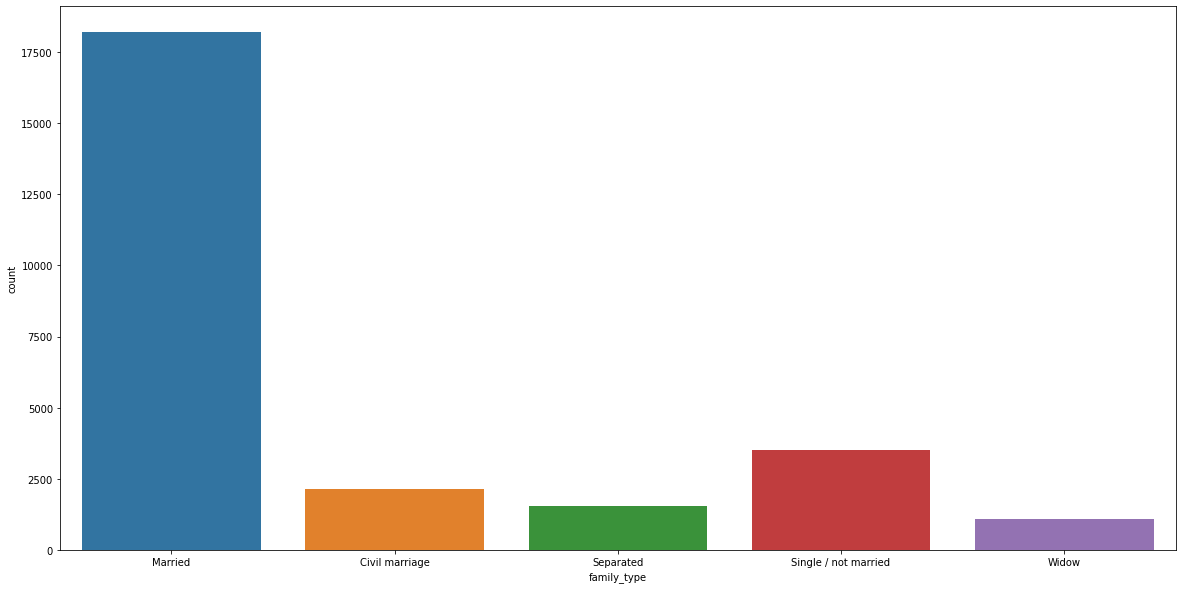

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


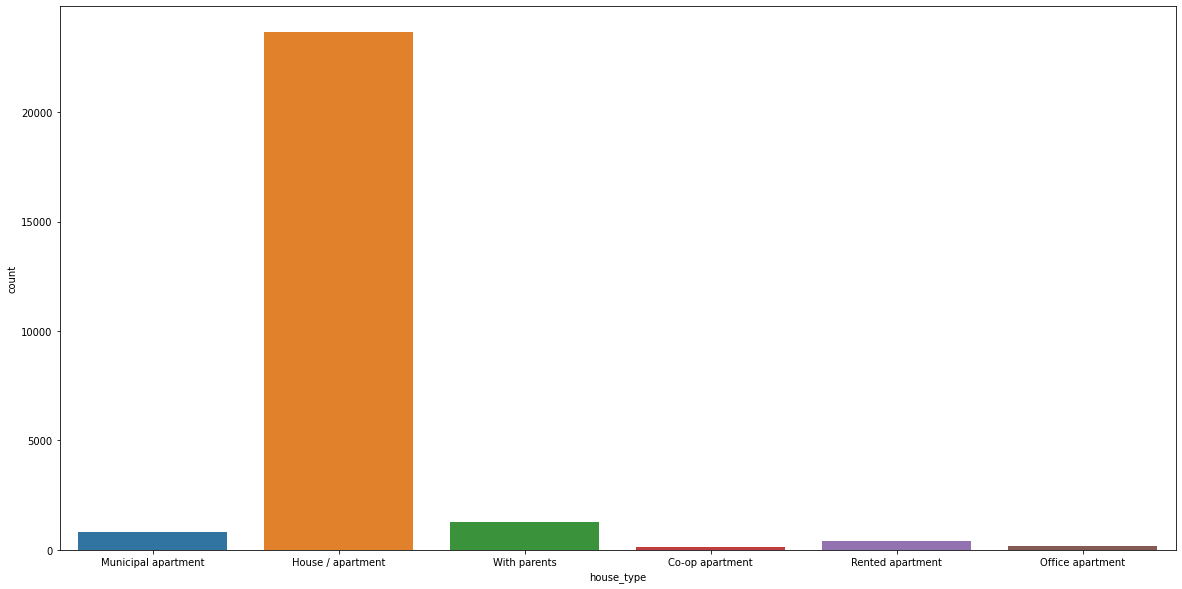

In [145]:
for i in train[['income_type','edu_type','family_type','house_type']]:
    plt.figure(figsize=(20,10))
    sns.countplot(i,data=df_train)
    plt.show()

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


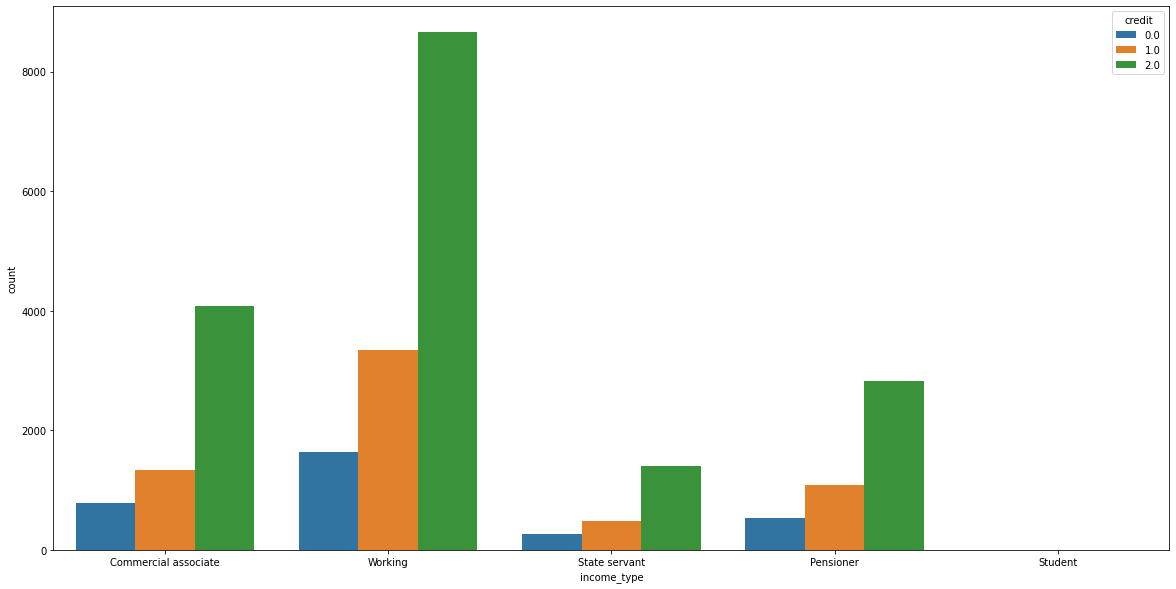

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


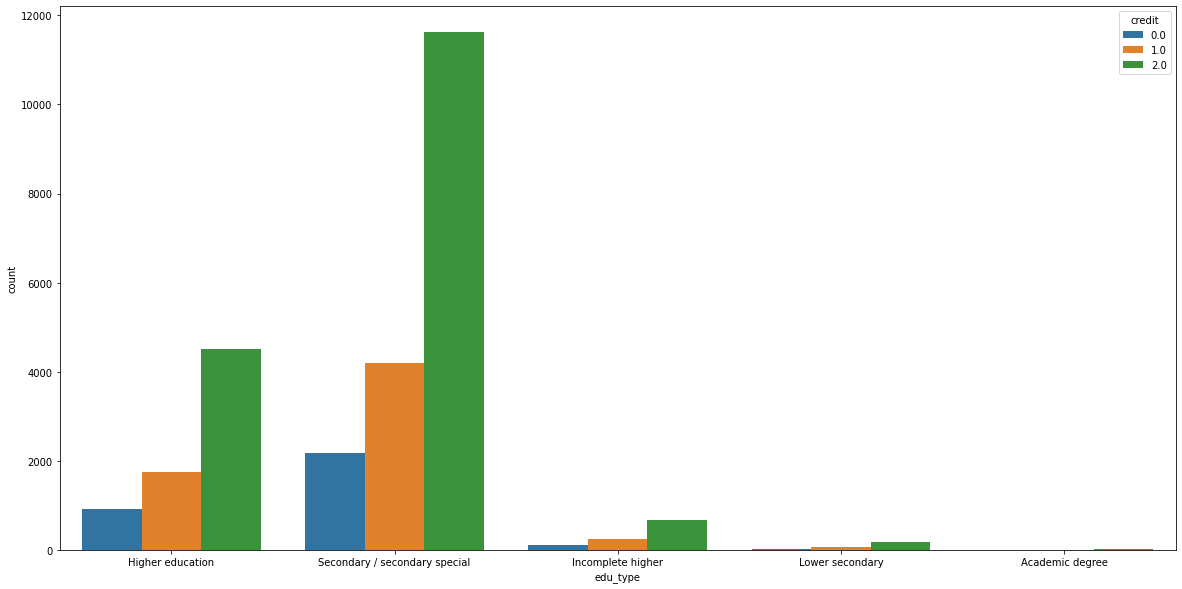

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


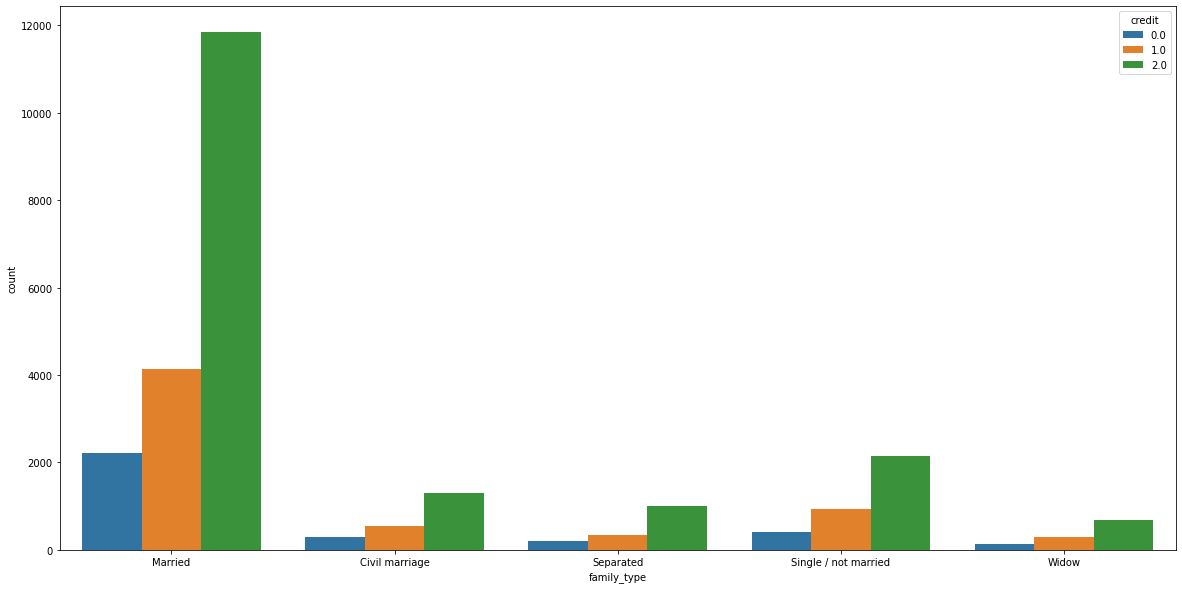

C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


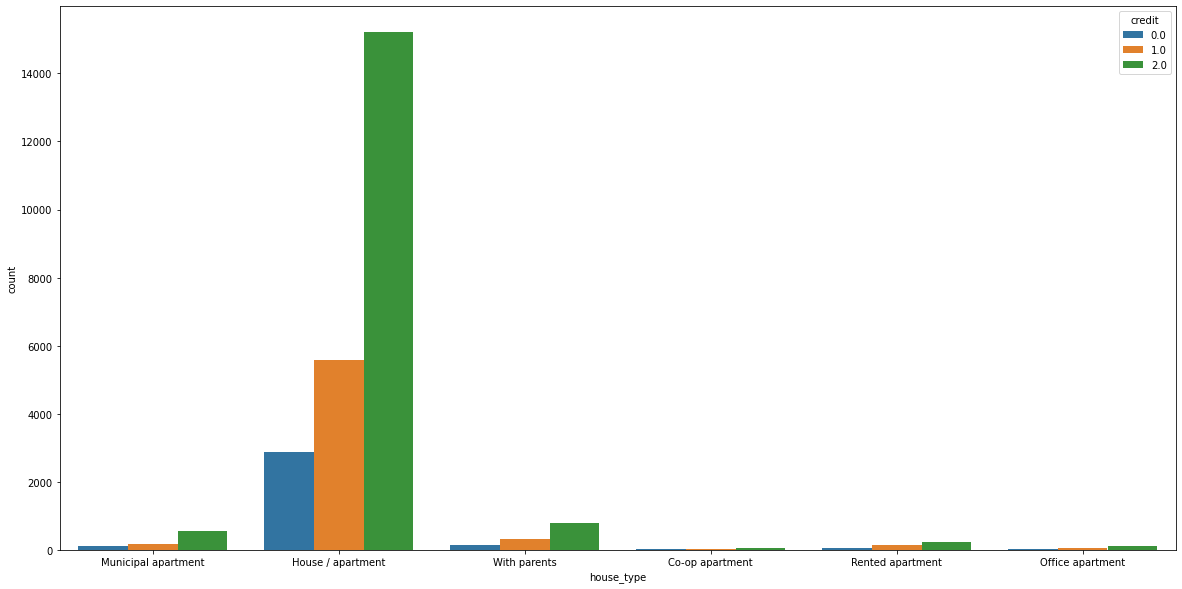

In [146]:
for i in train[['income_type','edu_type','family_type','house_type']]:
    plt.figure(figsize=(20,10))
    sns.countplot(i,hue='credit',data=df_train)
    plt.show()
    #회사원,중&고등학생,혼인,아파트에 사는 사람들이 신용도가 낮은 편이다.
    #순위별로 나누어있는게 아니면 원핫 인코딩해야함..

In [147]:
print(df_train['income_type'].unique())
print(df_train['edu_type'].unique())
print(df_train['family_type'].unique())
print(df_train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [148]:
df_train.loc[df_train['DAYS_EMPLOYED']>0] #양수값일 경우 고용되지 않은 상태를 의미

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,0,1,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,0,1,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,0,0,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,0,0,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,0,0,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,0,1,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1.0,-60.0,1.0
26432,26432,F,1,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2.0,-17.0,1.0
26439,26439,F,0,1,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,0,1,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0


In [149]:
#라벨화
label_encoder=preprocessing.LabelEncoder()
df_train['income_type']=label_encoder.fit_transform(df_train['income_type'])
df_test['income_type']=label_encoder.transform(df_test['income_type'])
#################################################################
df_train['edu_type']=label_encoder.fit_transform(df_train['edu_type'])
df_test['edu_type']=label_encoder.transform(df_test['edu_type'])
########################################################################
df_train['family_type']=label_encoder.fit_transform(df_train['family_type'])
df_test['family_type']=label_encoder.transform(df_test['family_type'])
########################################################################
df_train['house_type']=label_encoder.fit_transform(df_train['house_type'])
df_test['house_type']=label_encoder.transform(df_test['house_type'])
########################################################################
#train['income_total']=label_encoder.fit_transform(train['income_total'])
#test['income_total']=label_encoder.fit_transform(test['income_total'])

In [150]:
df_train['FLAG_MOBIL'].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

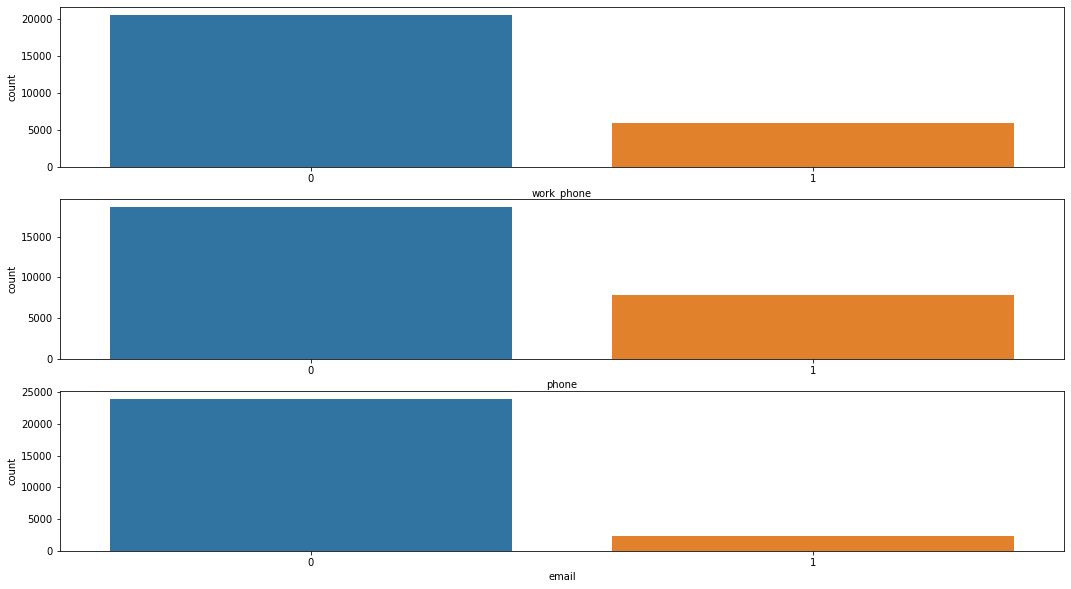

In [151]:
figure,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(18,10)
sns.countplot(data=df_train, x="work_phone", ax=ax1)
sns.countplot(data=df_train, x="phone", ax=ax2)
sns.countplot(data=df_train, x="email", ax=ax3)
plt.show()
#휴대폰 소유를 하고 업무용 전화,전화,이메일 소유는 적은 편이다.

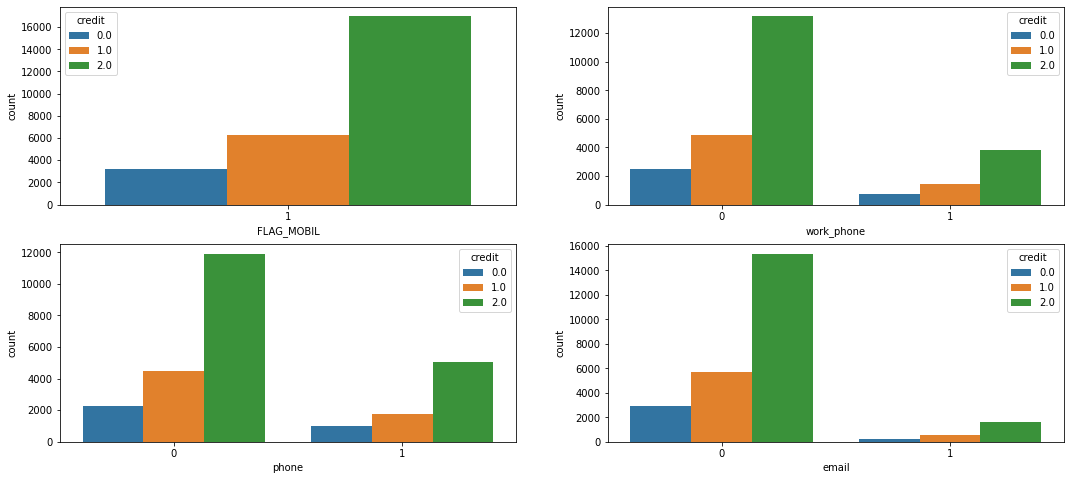

In [152]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(18,8)

sns.countplot(data=df_train, x="FLAG_MOBIL", hue='credit', ax=ax1)
#전원 휴대폰 소지,신용등급 낮은 편
sns.countplot(data=df_train, x="work_phone", hue='credit', ax=ax2)
sns.countplot(data=df_train, x="phone",hue='credit', ax=ax3)
sns.countplot(data=df_train, x="email",hue='credit', ax=ax4)
plt.show()
#업무용 전화 소유 여부가 많고 전화,이메일 소유하지 않은 사람 중에서 신용이 낮은 사람이 많다.

In [153]:
print('Having a phone or not: ')
print(df_train['phone'].value_counts())
print('--------------')
      
print('Having a email or not: ')
print(df_train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(df_train['work_phone'].value_counts())
print('--------------')

Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


<AxesSubplot:>

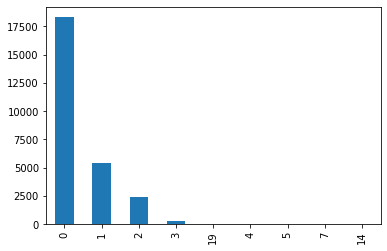

In [154]:
##연속형 변수(자녀 수)
df_train['child_num'].value_counts(sort=False).plot.bar()

In [155]:
#자녀가 2명 이상이면 2로 처리(보류)
df_train.loc[df_train['child_num'] >= 2,'child_num']=2
df_test.loc[df_test['child_num']>=2, 'child_num']=2

In [156]:
print(df_train['child_num'].value_counts())

0    18340
1     5386
2     2731
Name: child_num, dtype: int64


<AxesSubplot:xlabel='child_num', ylabel='count'>

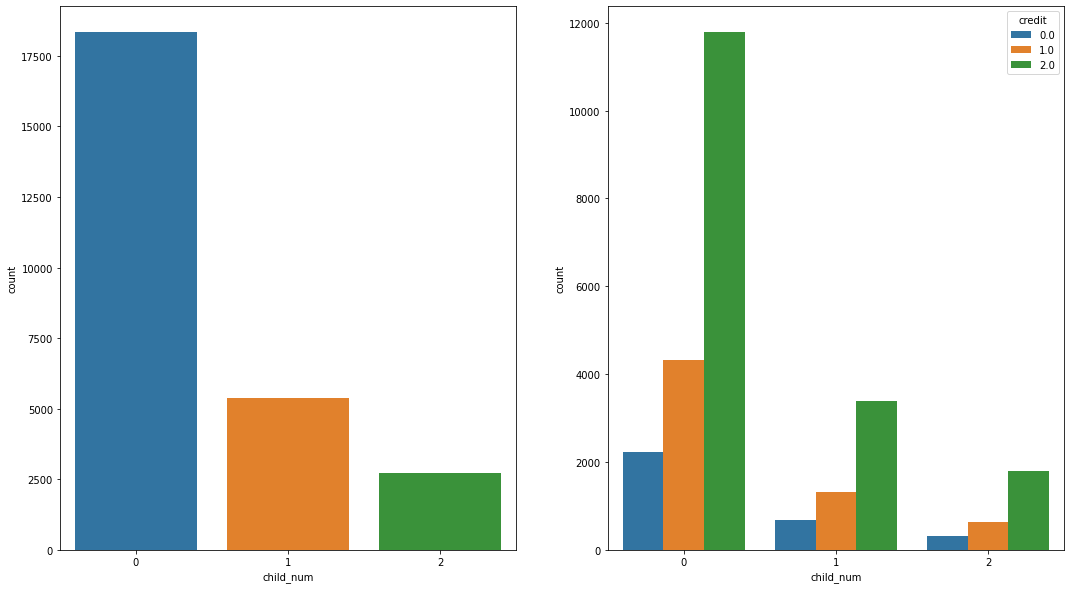

In [157]:
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(18,10)
sns.countplot(data=df_train, x="child_num", ax=ax1)
sns.countplot(data=df_train, x="child_num",hue='credit',ax=ax2)
#자녀가 없는 회원이 제일 많고 그 중에서 신용등급이 제일 낮은 편이다.

In [160]:
df_train['gender'] = df_train['gender'].replace(['F','M'],[0,1])
df_test['gender'] = df_test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

gender :
F    17697
M     8760
Name: gender, dtype: int64
--------------


In [161]:
df_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [162]:
df_test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,employeed,age
0,26457,1,1,0,0,112500.0,1,4,0,1,...,365243,1,0,1,0,NaN,2.0,-60.0,0,0
1,26458,0,0,1,0,135000.0,2,1,1,1,...,-8671,1,0,1,0,Core staff,2.0,-36.0,1,23
2,26459,0,0,1,0,69372.0,4,4,1,1,...,-217,1,1,1,0,Laborers,2.0,-40.0,1,0
3,26460,1,1,0,0,112500.0,0,4,1,1,...,-2531,1,1,0,0,Drivers,2.0,-41.0,1,6
4,26461,0,1,1,0,225000.0,2,1,1,1,...,-9385,1,1,0,0,Managers,2.0,-8.0,1,25


In [163]:
plus_month=train.loc[df_train['begin_month']>=0]
plus_month['begin_month'].value_counts()
#begin_month은 0이 231임(신용카드 발급 상태 1달도 안됨)

0.0    231
Name: begin_month, dtype: int64

In [164]:
df_train.loc[df_train['DAYS_BIRTH']>=0] #전부 minus

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [165]:
df_train['begin_year']=-df_train['begin_month']//12
df_train.head()#신용카드 발급한지 몇년?

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,begin_year
0,0,0,0,0,0,202500.0,0,1,1,2,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,0.0
1,1,0,0,1,1,247500.0,0,4,0,1,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,0.0
2,2,1,1,1,0,450000.0,4,1,1,1,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1.0
3,3,0,0,1,0,202500.0,0,4,1,1,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,3.0
4,4,0,1,1,0,157500.0,2,1,1,1,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,2.0


<AxesSubplot:>

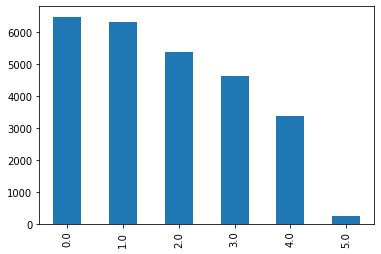

In [167]:
df_train['begin_year'].value_counts().plot(kind='bar')
#발급받은지 2년 이내가 많은 편이다.

In [168]:
df_train['begin_year'].value_counts()#4,5를 합치고 5개 구간으로 

0.0    6488
1.0    6322
2.0    5377
3.0    4643
4.0    3392
5.0     235
Name: begin_year, dtype: int64

In [169]:
print(df_train['begin_year'].value_counts(bins=5,sort=False))

(-0.006, 1.0]    12810
(1.0, 2.0]        5377
(2.0, 3.0]        4643
(3.0, 4.0]        3392
(4.0, 5.0]         235
Name: begin_year, dtype: int64


In [170]:
df_train['age']=-df_train['DAYS_BIRTH']//365
df_train.head() #나이 계산

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,begin_year,age
0,0,0,0,0,0,202500.0,0,1,1,2,...,1,0,0,0,NaN,2.0,-6.0,1.0,0.0,38
1,1,0,0,1,1,247500.0,0,4,0,1,...,1,0,0,1,Laborers,3.0,-5.0,1.0,0.0,31
2,2,1,1,1,0,450000.0,4,1,1,1,...,1,0,1,0,Managers,2.0,-22.0,2.0,1.0,52
3,3,0,0,1,0,202500.0,0,4,1,1,...,1,0,1,0,Sales staff,2.0,-37.0,0.0,3.0,41
4,4,0,1,1,0,157500.0,2,1,1,1,...,1,0,0,0,Managers,2.0,-26.0,2.0,2.0,41


C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

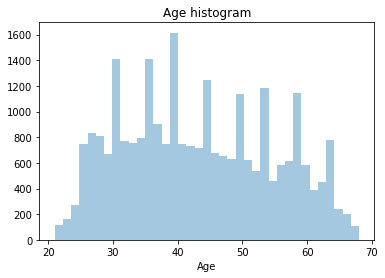

In [171]:
#신용카드를 사용한 사람들의 연령층
ax=plt.subplots()
ax=sns.distplot(df_train['age'],kde=False)
ax.set_title('Age histogram')
ax.set_xlabel('Age')
#20대 초반에서 60대 후반까지 분포한다.

In [172]:
print(df_train['age'].value_counts(bins=5,sort=False))

(20.951999999999998, 30.4]    4324
(30.4, 39.8]                  6869
(39.8, 49.2]                  6769
(49.2, 58.6]                  5152
(58.6, 68.0]                  3343
Name: age, dtype: int64


In [174]:
#days_employed가 양수일 경우:365243으로 나옴
employeed=df_train.loc[df_train['DAYS_EMPLOYED']<0]
employeed.head() 

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,begin_year,age
0,0,0,0,0,0,202500.0,0,1,1,2,...,1,0,0,0,NaN,2.0,-6.0,1.0,0.0,38
1,1,0,0,1,1,247500.0,0,4,0,1,...,1,0,0,1,Laborers,3.0,-5.0,1.0,0.0,31
2,2,1,1,1,0,450000.0,4,1,1,1,...,1,0,1,0,Managers,2.0,-22.0,2.0,1.0,52
3,3,0,0,1,0,202500.0,0,4,1,1,...,1,0,1,0,Sales staff,2.0,-37.0,0.0,3.0,41
4,4,0,1,1,0,157500.0,2,1,1,1,...,1,0,0,0,Managers,2.0,-26.0,2.0,2.0,41


In [175]:
#업무 연차 빈도
employeed['employed_year']=-employeed['DAYS_EMPLOYED']//365

C:\Users\zzang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\zzang\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'year')

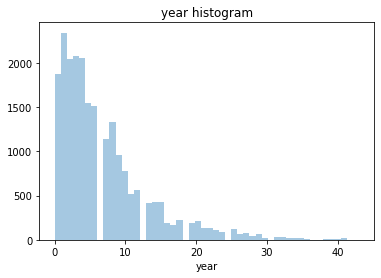

In [176]:
#고용된 연도 분포
ax=plt.subplots()
ax=sns.distplot(employeed['employed_year'],kde=False)
ax.set_title('year histogram')
ax.set_xlabel('year')
#20대 후반에서 40대까지 분포한다.

In [177]:
print(employeed['employed_year'].value_counts(bins=4,sort=True))

(-0.044, 10.75]    17631
(10.75, 21.5]       3469
(21.5, 32.25]        791
(32.25, 43.0]        128
Name: employed_year, dtype: int64


In [178]:
print(max(employeed['employed_year']))
print(min(employeed['employed_year']))

43
0


In [179]:
print(max(df_train['age']))
print(min(df_train['age']))

68
21


In [180]:
print(max(df_train['begin_year']))
print(min(df_train['begin_year']))

5.0
0.0


In [181]:
employeed.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,begin_year,age,employed_year
0,0,0,0,0,0,202500.0,0,1,1,2,...,0,0,0,NaN,2.0,-6.0,1.0,0.0,38,12
1,1,0,0,1,1,247500.0,0,4,0,1,...,0,0,1,Laborers,3.0,-5.0,1.0,0.0,31,4
2,2,1,1,1,0,450000.0,4,1,1,1,...,0,1,0,Managers,2.0,-22.0,2.0,1.0,52,12
3,3,0,0,1,0,202500.0,0,4,1,1,...,0,1,0,Sales staff,2.0,-37.0,0.0,3.0,41,5
4,4,0,1,1,0,157500.0,2,1,1,1,...,0,0,0,Managers,2.0,-26.0,2.0,2.0,41,5


In [182]:
def make_bin(variable, n):#minus 변경하고 구간화
    df_train[variable]=-df_train[variable]
    df_test[variable]=-df_test[variable]
    count, bin_dividers =np.histogram(df_train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    df_train[variable]=pd.cut(x=df_train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    df_test[variable]=pd.cut(x=df_test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    df_test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    df_train[variable]=label_encoder.fit_transform(df_train[variable])
    df_test[variable]=label_encoder.transform(df_test[variable])

In [183]:
make_bin('DAYS_BIRTH', n=5)#age
make_bin('DAYS_EMPLOYED', n=4)#employeed_year
make_bin('begin_month', n=5)##begin_year

In [184]:
df_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,begin_year,age
0,0,0,0,0,0,202500.0,0,1,1,2,...,1,0,0,0,NaN,2.0,0,1.0,0.0,38
1,1,0,0,1,1,247500.0,0,4,0,1,...,1,0,0,1,Laborers,3.0,0,1.0,0.0,31
2,2,1,1,1,0,450000.0,4,1,1,1,...,1,0,1,0,Managers,2.0,1,2.0,1.0,52
3,3,0,0,1,0,202500.0,0,4,1,1,...,1,0,1,0,Sales staff,2.0,3,0.0,3.0,41
4,4,0,1,1,0,157500.0,2,1,1,1,...,1,0,0,0,Managers,2.0,2,2.0,2.0,41


In [185]:
df_train=df_train.drop(['begin_year','age'],axis=1)
df_train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')